<a href="https://colab.research.google.com/github/annatrajano/wine-quality-mm/blob/main/MMM_WineQuality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Definição do Modelo Machine Learning - Dataset: Wine Quality**

*   Aluna: *Anna Beatriz Garcia Trajano de Sá*
*   Dataset (referência) : https://archive.ics.uci.edu/dataset/186/wine+quality

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

## Carga do Dataset

In [ ]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/annatrajano/wine-quality-mm/main/api/winequality-white.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';')

# Mostra as primeiras linhas do dataset
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


## Gráficos para avaliar o conjunto de dados do dataset

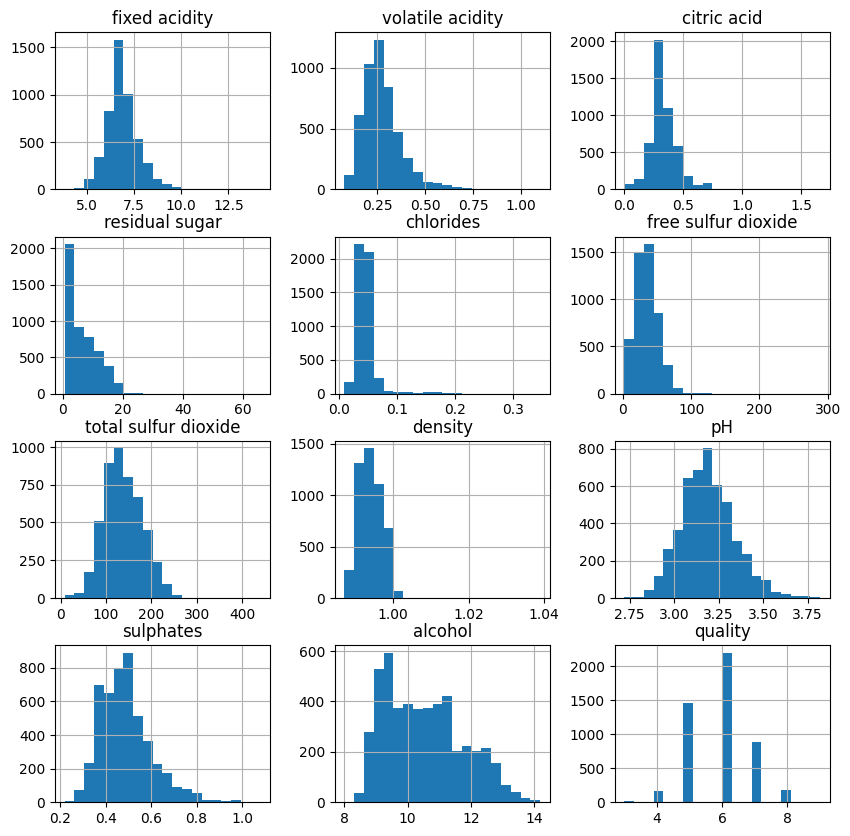

In [ ]:
# Histograma dos atributos:
dataset.hist(bins=20, figsize=(10, 10))
plt.show()

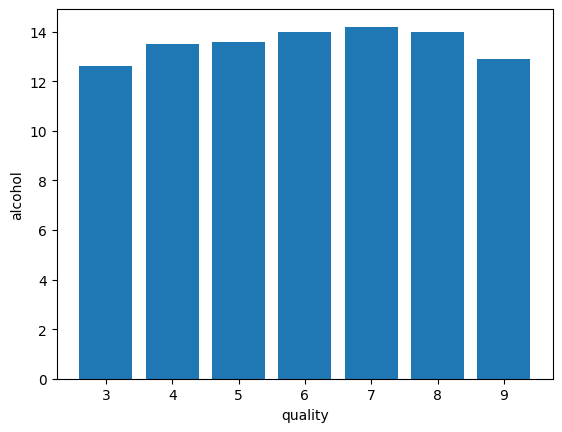

In [ ]:
# Histograma do número de vinhos de acordo com a qualidade:
plt.bar(dataset['quality'], dataset['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()


## Separação em conjunto de treino e conjunto de teste

In [ ]:
# Splitting the dataset into the Training set and Test set
X = dataset.drop('quality', axis=1)
y = dataset['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Modelagem e Inferência

### Normalização dos dados:

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(X_train)
xtest = norm.transform(X_test)

### Criação e treinamento dos modelos:

In [ ]:
# Model 1: Random Forest Classifier model
#rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model 2: Logistic Regression
lr_model = LogisticRegression()

# Model 3: SVM - SVC(kernel='rbf')
#svm_model = SVC(kernel='rbf')

# Fitting Random Forest to the Training set
#rf_model.fit(xtrain, y_train)

# Fitting Logistic Regression to the Training set
lr_model.fit(xtrain, y_train)

# Fitting SVC(kernel='rbf') to the Training set
#svm_model.fit(xtrain, y_train)



LogisticRegression()

### Predição para os conjuntos de teste:

In [ ]:
# Random Forest Regression
#y_pred = rf_model.predict(xtest)

# Logistic Regression
y_pred = lr_model.predict(xtest)

# SVC(kernel='rbf')
#y_pred = svm_model.predict(xtest)

### Avaliação da Acurácia dos modelos:

In [ ]:
# Random Forest Regression
#accuracy = mean_squared_error(y_test, y_pred)
#print('Accuracy:', accuracy)

# Logistic Regression
accuracy = mean_squared_error(y_test, y_pred)
print('Accuracy:', accuracy)

# SVC(kernel='rbf')
#accuracy = mean_squared_error(y_test, y_pred)
#print('Accuracy:', accuracy)

Accuracy: 0.7151020408163266


## Simulação com dados fictícios para predição:

In [ ]:
# Define the new sample as a numpy array
new_sample = np.array([6.2,0.66,0.48,1.2,0.029,29,75,0.9892,3.33,0.39,12.8]).reshape(1,-1)

# Use the trained model to make a prediction on the new sample
prediction = lr_model.predict(new_sample)

# Print the predicted quality of the new sample
print('Predicted quality:', prediction[0])

Predicted quality: 8


### Criação do arquivo .pkl:

In [ ]:
# Saving model to disk
pickle.dump(lr_model, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict(new_sample))

## Resultado final:

In [ ]:
# Comparando o resultado dos três algoritmos escolhidos, o de Regressão Logística apresenta a melhor acurácia.